In [1]:
from fastai.vision.all import *

In [3]:
%matplotlib inline
%reload_ext autoreload

In [4]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [2]:
!nvidia-smi

Tue Jul  2 16:27:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 960M        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   64C    P8              N/A /  20W |      5MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
%cd /home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray

/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray


In [6]:
from pathlib import Path
path = Path('.')

In [7]:
# dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_2_class', valid_pct= 0.2, item_tfms=Resize(224))

dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_3_class', valid_pct= 0.3, shuffle=True, item_tfms=Resize(224), bs=32, seed=42)

In [8]:
dls.valid_ds

(#74) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0))...]

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [10]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.783624,1.275625,0.418919,00:05
1,1.593097,1.041292,0.432432,00:05
2,1.407638,0.852816,0.418919,00:05
3,1.213732,0.790158,0.378378,00:05
4,1.075715,0.644877,0.229730,00:05
5,0.933076,0.567495,0.202703,00:05
6,0.833844,0.518235,0.216216,00:05
7,0.752966,0.490231,0.229730,00:04
8,0.693552,0.461976,0.243243,00:05
9,0.640028,0.406004,0.162162,00:04


SuggestedLRs(valley=0.00019054606673307717)

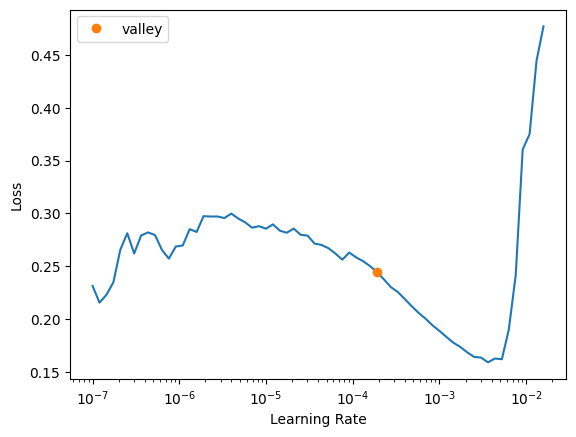

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(10, base_lr=0.00019054606673307717)

epoch,train_loss,valid_loss,error_rate,time
0,0.324265,0.353550,0.148649,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.342036,0.299572,0.094595,00:05
1,0.319287,0.264601,0.121622,00:04
2,0.302807,0.220004,0.081081,00:05
3,0.286848,0.166382,0.040541,00:05
4,0.249040,0.139894,0.040541,00:04
5,0.230638,0.119032,0.040541,00:05
6,0.213160,0.108811,0.027027,00:04
7,0.197255,0.101661,0.027027,00:05
8,0.186733,0.097603,0.040541,00:04
9,0.175409,0.096280,0.027027,00:05


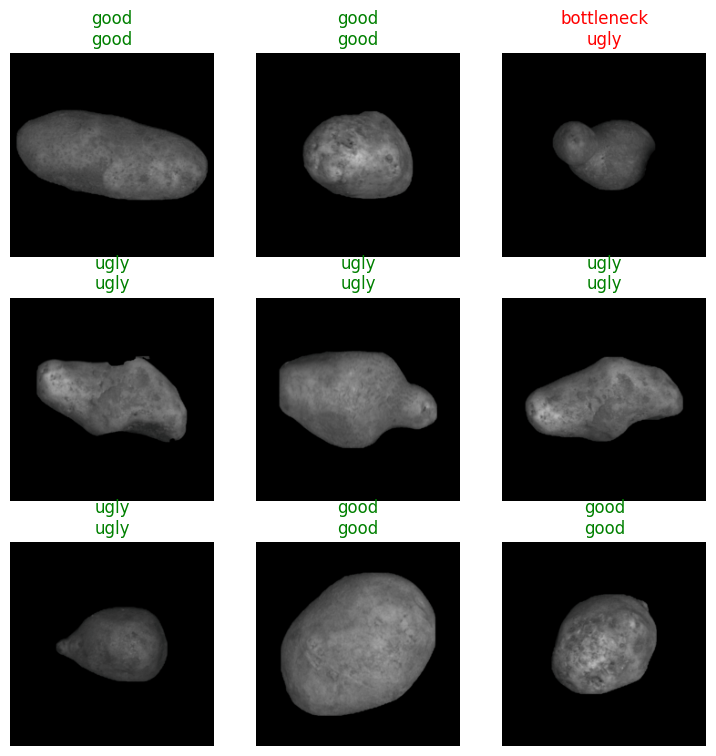

In [13]:
learn.show_results()

In [14]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [15]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,2.085974,1.455042,0.351351,00:05
1,2.010347,1.273631,0.391892,00:05
2,1.866470,1.321063,0.405405,00:05
3,1.744003,1.277156,0.445946,00:05
4,1.625360,1.289528,0.418919,00:04
5,1.460615,1.405555,0.391892,00:05
6,1.357685,1.601767,0.378378,00:04
7,1.262079,1.663972,0.378378,00:05
8,1.171817,1.535060,0.405405,00:04
9,1.096965,1.390026,0.405405,00:04


SuggestedLRs(valley=0.00013182566908653826)

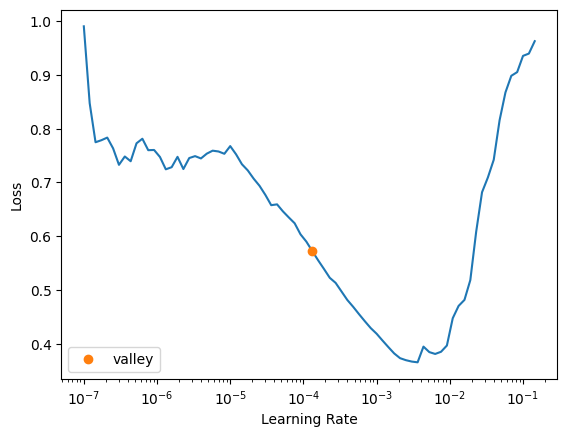

In [16]:
learn_accuracy.lr_find()

In [17]:
learn_accuracy.fine_tune(15, base_lr=0.00013182566908653826)

epoch,train_loss,valid_loss,accuracy,time
0,0.805090,1.204661,0.486486,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.758360,1.094168,0.500000,00:04
1,0.679073,0.953040,0.581081,00:05
2,0.641767,0.764214,0.689189,00:05
3,0.597102,0.585369,0.783784,00:04
4,0.558370,0.420278,0.851351,00:05
5,0.516314,0.258324,0.918919,00:04
6,0.469890,0.189455,0.959459,00:05
7,0.432702,0.153274,0.972973,00:05
8,0.396458,0.141605,0.959459,00:05
9,0.360823,0.127160,0.972973,00:05


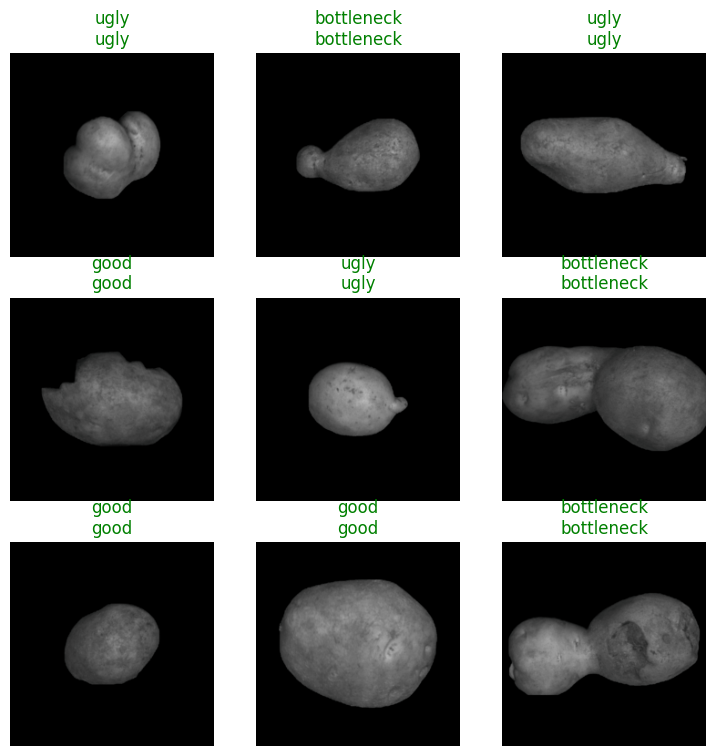

In [18]:
learn_accuracy.show_results()

In [18]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
learn.predict("/home/mishkat/Downloads/potato_good_malformed/360_F_85799278_0BBGV9OAdQDTLnKwAPBCcg1J7QtiieJY.jpg")

('malformed', tensor(1), tensor([0.0565, 0.9435]))

In [19]:
learn.export("/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray/models/export_3_class_70:30_gray.pkl")

In [8]:
# Load Model
new_loaded_model = load_learner('/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/model_2_class_70_30_split.pth', cpu=True)

AttributeError: 'dict' object has no attribute 'dls'

In [22]:
test_loaded_model = load_learner('/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/test.pkl', cpu=True)

In [25]:
# test_loaded_model.predict("/home/mishkat/Downloads/potato_good_malformed/int_potato.jpg")
test_loaded_model.predict("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/good/Afra_12_2_1_110_2.png")

('good', tensor(0), tensor([0.9976, 0.0024]))